In [158]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [160]:
X = data.T.copy()
y = target.copy()
coef

array([62.6735955, 68.0472182])

In [161]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [162]:
def eval_model(X, y, iterations, alpha=1e-4):
    r_eval = []
    a = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_eval.append([i, err])
    r_eval  = np.asarray(r_eval)        
    return W, r_eval

In [163]:
r_eval = np.array([])
W_eval, r_eval = eval_model(X, y, iterations=1000, alpha=1e-2)
W_eval

100 [53.28191669 58.65481316] 199.61807378645807
200 [61.00244372 66.89096756] 30.084457624662164
300 [62.13388695 68.07924021] 26.5032064232814
400 [62.29956681 68.25080328] 26.42753846559995
500 [62.32381036 68.27559009] 26.42593938881043
600 [62.32735561 68.27917338] 26.42590559074356
700 [62.32787375 68.27969168] 26.425904876300656
800 [62.32794944 68.27976669] 26.42590486119685
900 [62.32796049 68.27977755] 26.42590486087752
1000 [62.3279621  68.27977912] 26.425904860870766


array([62.3279621 , 68.27977912])

In [164]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    r_sgb = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_sgb.append([i, err])
    r_sgb  = np.asarray(r_sgb)
    return W, r_sgb

In [165]:
r_sgb = np.array([])
w_sgb, r_sgb = eval_sgd_model(X, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
w_sgb

100 [52.97736775 58.22127319] 3.0811107955193604
200 [60.93118372 66.80142626] 23.42797454955328
300 [62.11896497 68.06184952] 28.00868224375945
400 [62.29619358 68.2471431 ] 28.714959432673048
500 [62.32261812 68.27440149] 28.819386529754386
600 [62.32655536 68.27841396] 28.83474535618557
700 [62.32714166 68.27900493] 28.83700392900999
800 [62.32722892 68.27909202] 28.837336239505472
900 [62.3272419  68.27910486] 28.837385162351488
1000 [62.32724383 68.27910676] 28.837392368807592


array([62.32724383, 68.27910676])

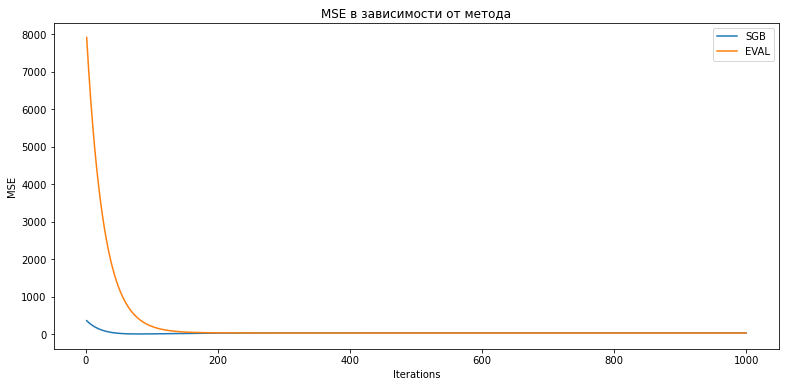

In [166]:
plt.figure(figsize=(13, 6))
plt.title('MSE в зависимости от метода')
plt.xlabel(r'Iterations')
plt.ylabel(r'MSE')

plt.plot(r_sgb[:, 0], r_sgb[:, 1], r_eval[:, 0], r_eval[:, 1])
plt.legend(("SGB", "EVAL"))
plt.show()

L2 регулизация

In [167]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    r_l2 = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_l2.append([i, err])
    r_l2  = np.asarray(r_l2)
    return W, r_l2

In [168]:
r_l2 = np.array([])
W_l2, r_l2 = eval_model_reg2(X, y, iterations=1000, alpha=1e-2, lambda_=1e-4)
W_l2

100 [53.24725692 58.42308297] 204.73733808633978
200 [60.99331793 66.85593124] 30.20630304070666
300 [62.1295916  68.07132914] 26.508043574077455
400 [62.29611853 68.24664146] 26.42799292713515
500 [62.32050396 68.27194766] 26.42601898540432
600 [62.32407225 68.27560306] 26.425936159207424
700 [62.32459406 68.27613139] 26.425928432741667
800 [62.32467032 68.2762078 ] 26.42592740085212
900 [62.32468146 68.27621886] 26.42592725279169
1000 [62.32468309 68.27622046] 26.42592723131077


array([62.32468309, 68.27622046])

L1 регулизация

In [169]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    r_l1 = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
        r_l1.append([i, err])
    r_l1  = np.asarray(r_l1)
    return W, r_l1

In [170]:
r_l1 = np.array([])
W_l1, r_l1 = eval_model_reg3(X, y, iterations=1000, alpha=1e-2, lambda_=1e-4)
W_l1

100 [53.24910717 58.42510163] 204.66655567526826
200 [60.99622931 66.85910068] 30.18999443781989
300 [62.13277446 68.0747884 ] 26.50543258765594
400 [62.29935816 68.2501604 ] 26.42758768204224
500 [62.32375439 68.2754778 ] 26.42594079248447
600 [62.32732462 68.27913519] 26.425905675152876
700 [62.32784676 68.27966387] 26.425904887152438
800 [62.32792308 68.27974033] 26.425904863839925
900 [62.32793423 68.2797514 ] 26.425904862379394
1000 [62.32793586 68.279753  ] 26.425904862207812


array([62.32793586, 68.279753  ])

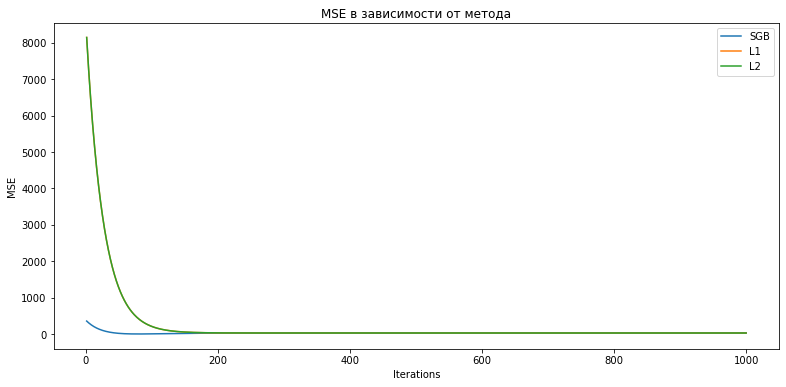

In [171]:
plt.figure(figsize=(13, 6))
plt.title('MSE в зависимости от метода')
plt.xlabel(r'Iterations')
plt.ylabel(r'MSE')

plt.plot(r_sgb[:, 0], r_sgb[:, 1], r_l1[:, 0], r_l1[:, 1], r_l2[:, 0], r_l2[:, 1])
plt.legend(("SGB", "L1", "L2"))
plt.show()